# Brain Tumor MRI Data Exploration and Preprocessing

We explore and preprocess a brain tumor MRI dataset from Kaggle by visualizing raw images and then appropriate image  transformations (i.e., grayscale, resize, tensor conversion, and normalization) to prep the data.

In [10]:
# Import libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Set seed for reproducibility
random.seed(42)


In [11]:
# import our own modules
import sys
sys.path.append('../src')  # Add the src directory to the Python path

# import data
from config.data import data_setup, data_loader, display_sample
from utils.visualization import plot_pixel_distribution, plot_class_distribution, plot_original_vs_transformed

In [12]:
# Load data and data_loaders
train_set, test_set, label_conversion_dict = data_setup()
train_loader, test_loader = data_loader(train_set, test_set)

# Extract the class labels from the dictionary keys
class_labels = list(label_conversion_dict.keys())[:4]

/home/skl5876/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1
None


100%|██████████| 6597/6597 [00:00<00:00, 10865.86it/s]


Initial number of samples in train set: 5505
Initial number of samples in test set: 1092
Total samples in train set after overriding labels: 5505
Total samples in test set after overriding labels: 1092
Total files in train set: 5505, with target values: [0, 1, 2, 3]
Total files in test set: 1092, with target values: [0, 1, 2, 3]


Let's display a random sample of images

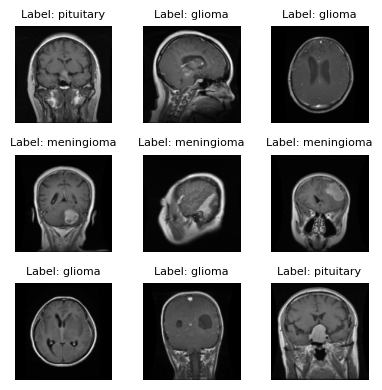

In [13]:
# Display a sample of images from train_set
display_sample(train_set)

**Transformation Pipeline Explanation**

- **Grayscale:**  
  Since the images have 3 channels but they are duplicates, then we simply convert to greyscale without losing information

- **Resize:**  
  Many of the images are different sizes e.g., above we have (168,300,3) so let's standardizes all images to 128x128 pixels for a consistent input size

- **ToTensor:**  
  Convert the image into a PyTorch tensor and scale pixel values between 0 and 1

- **Normalize:**  
  Centers and scales pixel values (subtracting 0.5 and dividing by 0.5) to stabilize model training


In [16]:
# Compute class counts for train/test
train_class_counts = [sum(1 for _, label in train_set if label == i) for i in range(len(class_labels))]
test_class_counts = [sum(1 for _, label in test_set if label == i) for i in range(len(class_labels))]

### Let's examine the distribution of classes for the training and testing set, and then look at the pixel intensities of a sample image to help us understand what's going on

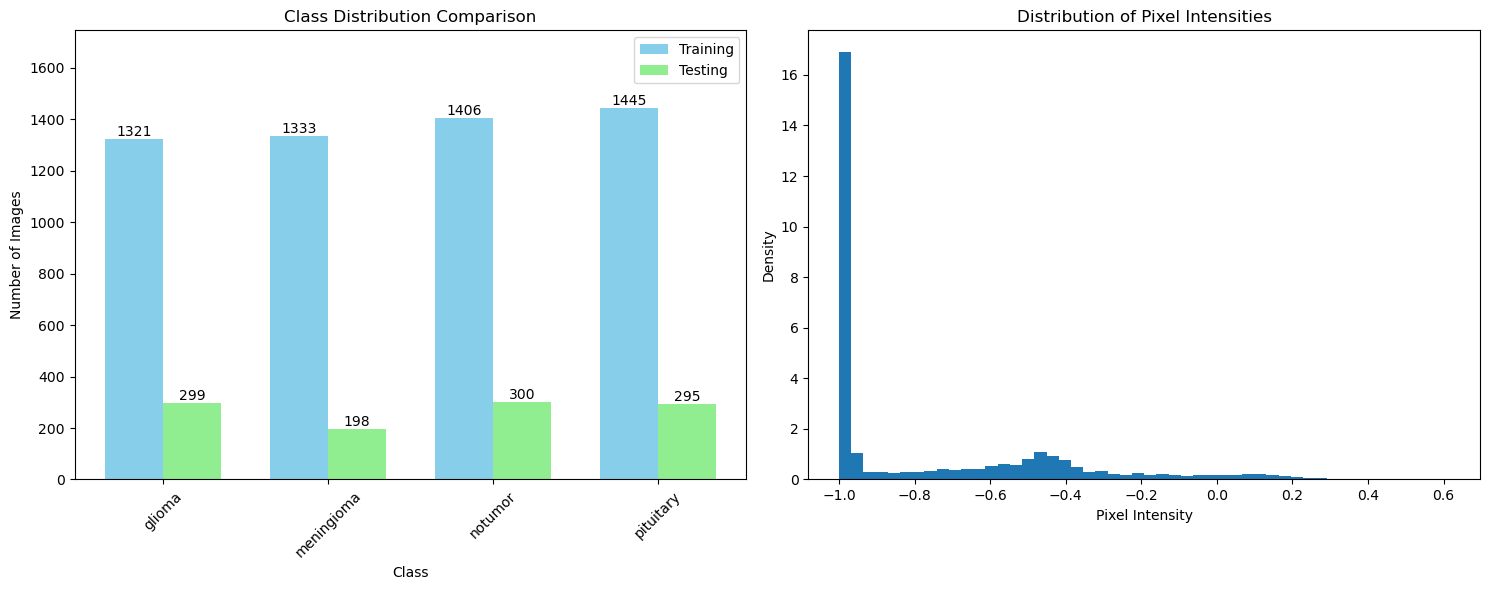

In [ ]:
img_trans_example, _ = train_set[0]

# Create a single figure with two subplots (side by side)
fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns

# Plot the distribution of each class for training and testing sets
plot_class_distribution(train_class_counts, test_class_counts, class_labels, axs[0])

# Show pixel intensities for the first image from train_set
plot_pixel_distribution(img_trans_example, axs[1])

# Show the figure
plt.tight_layout()
plt.show()

The bar charts on the left show a relatively even distribution across the three classes and healthy patients (notumor)

This histogram on the right shows the distribution of pixel intensities after applying our transformation pipeline (greyscale, resizing, normalization). Most pixel values are ~ -1.0 since our normalization subtracts 0.5 and divides by 0.5, i.e., they are around 0 in the original image, as we would expect for a lot of the outer pixels (i.e., outside the brain).

Next let's compare some of the original images to their transformed versions to check they are consistent.

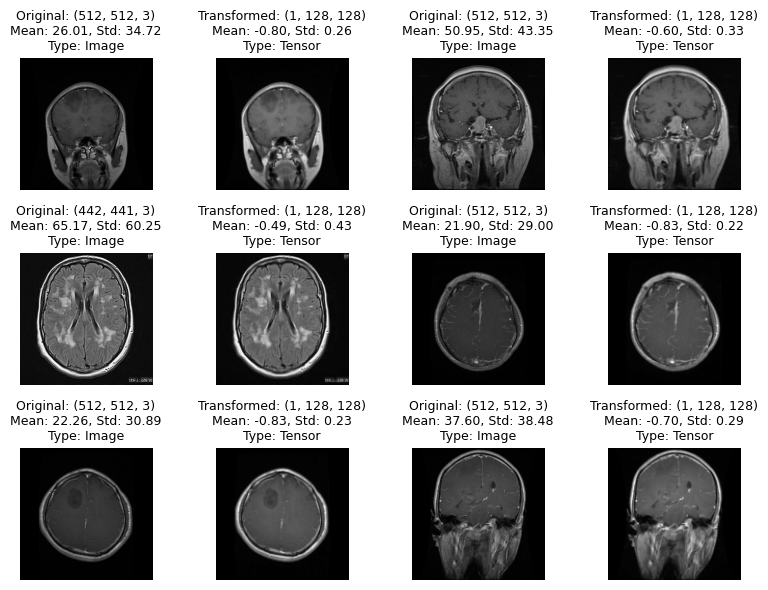

In [15]:
plot_original_vs_transformed(train_set, train_set.transform)

We can see that we've transformed images of different sizes to a consistent size which will be accepted by the CNNs we will use subsequently, and the images have been transformed to tensors, which is a requirement for PyTorch which we will be using.

## Summary
The dataset comes with a pre-defined split of 5,505 training samples and 1,092 testing samples which seems reasonable for now and we believe should work with our deep learning approaches. However, we can keep an eye on model performance, and could add some extra data augmentation steps that might help improve model performance, which might be worthwhile working on at some point. In terms of preprocessing, we converted the images to greyscale, resized them to 128x128 pixels for consistency across iamges, converted them into a PyTorch tensor, and then standardized the pixel intensities to ensure consistent inputs into the model.